# Horseshoe orbit of 2013 BS45

Figure 2.7 from Chapter 2 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Horseshoe orbit of the object 2013 BS45, integrated from 1934, when it made a close approach to the Earth,
to 2013, when it was discovered during its next close approach.  Closest approaches were on 1934 Aug 16 and
2013 Feb 12.  We plot the orbit for a few days before and after these approaches.

Orbit data for 2013BS45 and Earth were computed using the JPL Horizons System web app: https://ssd.jpl.nasa.gov/horizons/app.html, and merged by hand into a single CSV file (`JPL_2013BS45_xyz.csv`) provided with this notebook.

Horizons app query parameters:
 * Ephemeris Type: Vector Table
 * Target Body: 2013 BS45 and the Earth-Moon barycenter ()
 * Coordinate Center: Sun (body center) [500@10]
 * Time Specification: Start=1934-07-01 TDB , Stop=2013-04-01, Step=10 (days)
 * Table Settings:
   * Output quantities: Position components {x,y,z} only
   * Reference frame: ICRF
   * Reference plane: ecliptic x-y plane derived from reference frame
   * Vector correction: geometric states
   * Calendar type: Mixed
   * Output units: au and days
   * check CSV format
   * leave all other settings at default
 
The JPL Horizons System was developed at the Jet Propulsion Laboratory (Solar System Dynamics Group), California Institute of Technology, under contract with the National Aeronautics and Space Administration.

Giorgini, JD and JPL Solar System Dynamics Group, NASA/JPL Horizons On-Line Ephemeris System, 
https://ssd.jpl.nasa.gov/horizons/, data retrieved 2023-Jul-15.


In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [6]:
plotFile = 'Fig2_7.png' 

# graphic aspect ratio = width/height

aspect = 1.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Read the data

Data is a vector file created by the JPL Horizons database.  We edited out the descriptive header and footer
and gave it a new header for easier reading by `pandas.read_csv()`.

In [7]:
xyzFile = 'JPL_2013BS45_xyz.csv'

data = pd.read_csv(xyzFile)

dateTDB = np.array(data['dateTDB'])

x = np.array(data['X']) 
y = np.array(data['Y']) 

xE = np.array(data['Xearth'])
yE = np.array(data['Yearth'])

# transform to co-rotating heliocentric coordinates with Earth at (1au,0au)

dX = x - xE
dY = y - yE

theta = np.arctan2(yE,xE)

xcr = dX*np.cos(theta) + dY*np.sin(theta) + 1.0
ycr = -dX*np.sin(theta) + dY*np.cos(theta)

# show each calculated position as a dot - usually just diagnostic

showDots = False

## Make the plot

Plot the orbit of 2013BS45 in corotating frame of the Earth-Sun system, indicating the dates of the first
and last points in the orbit calculation. 

Plot the Sun as the white-filled circle at (0,0) and the Earth as a gray-filled circle at (0,1)

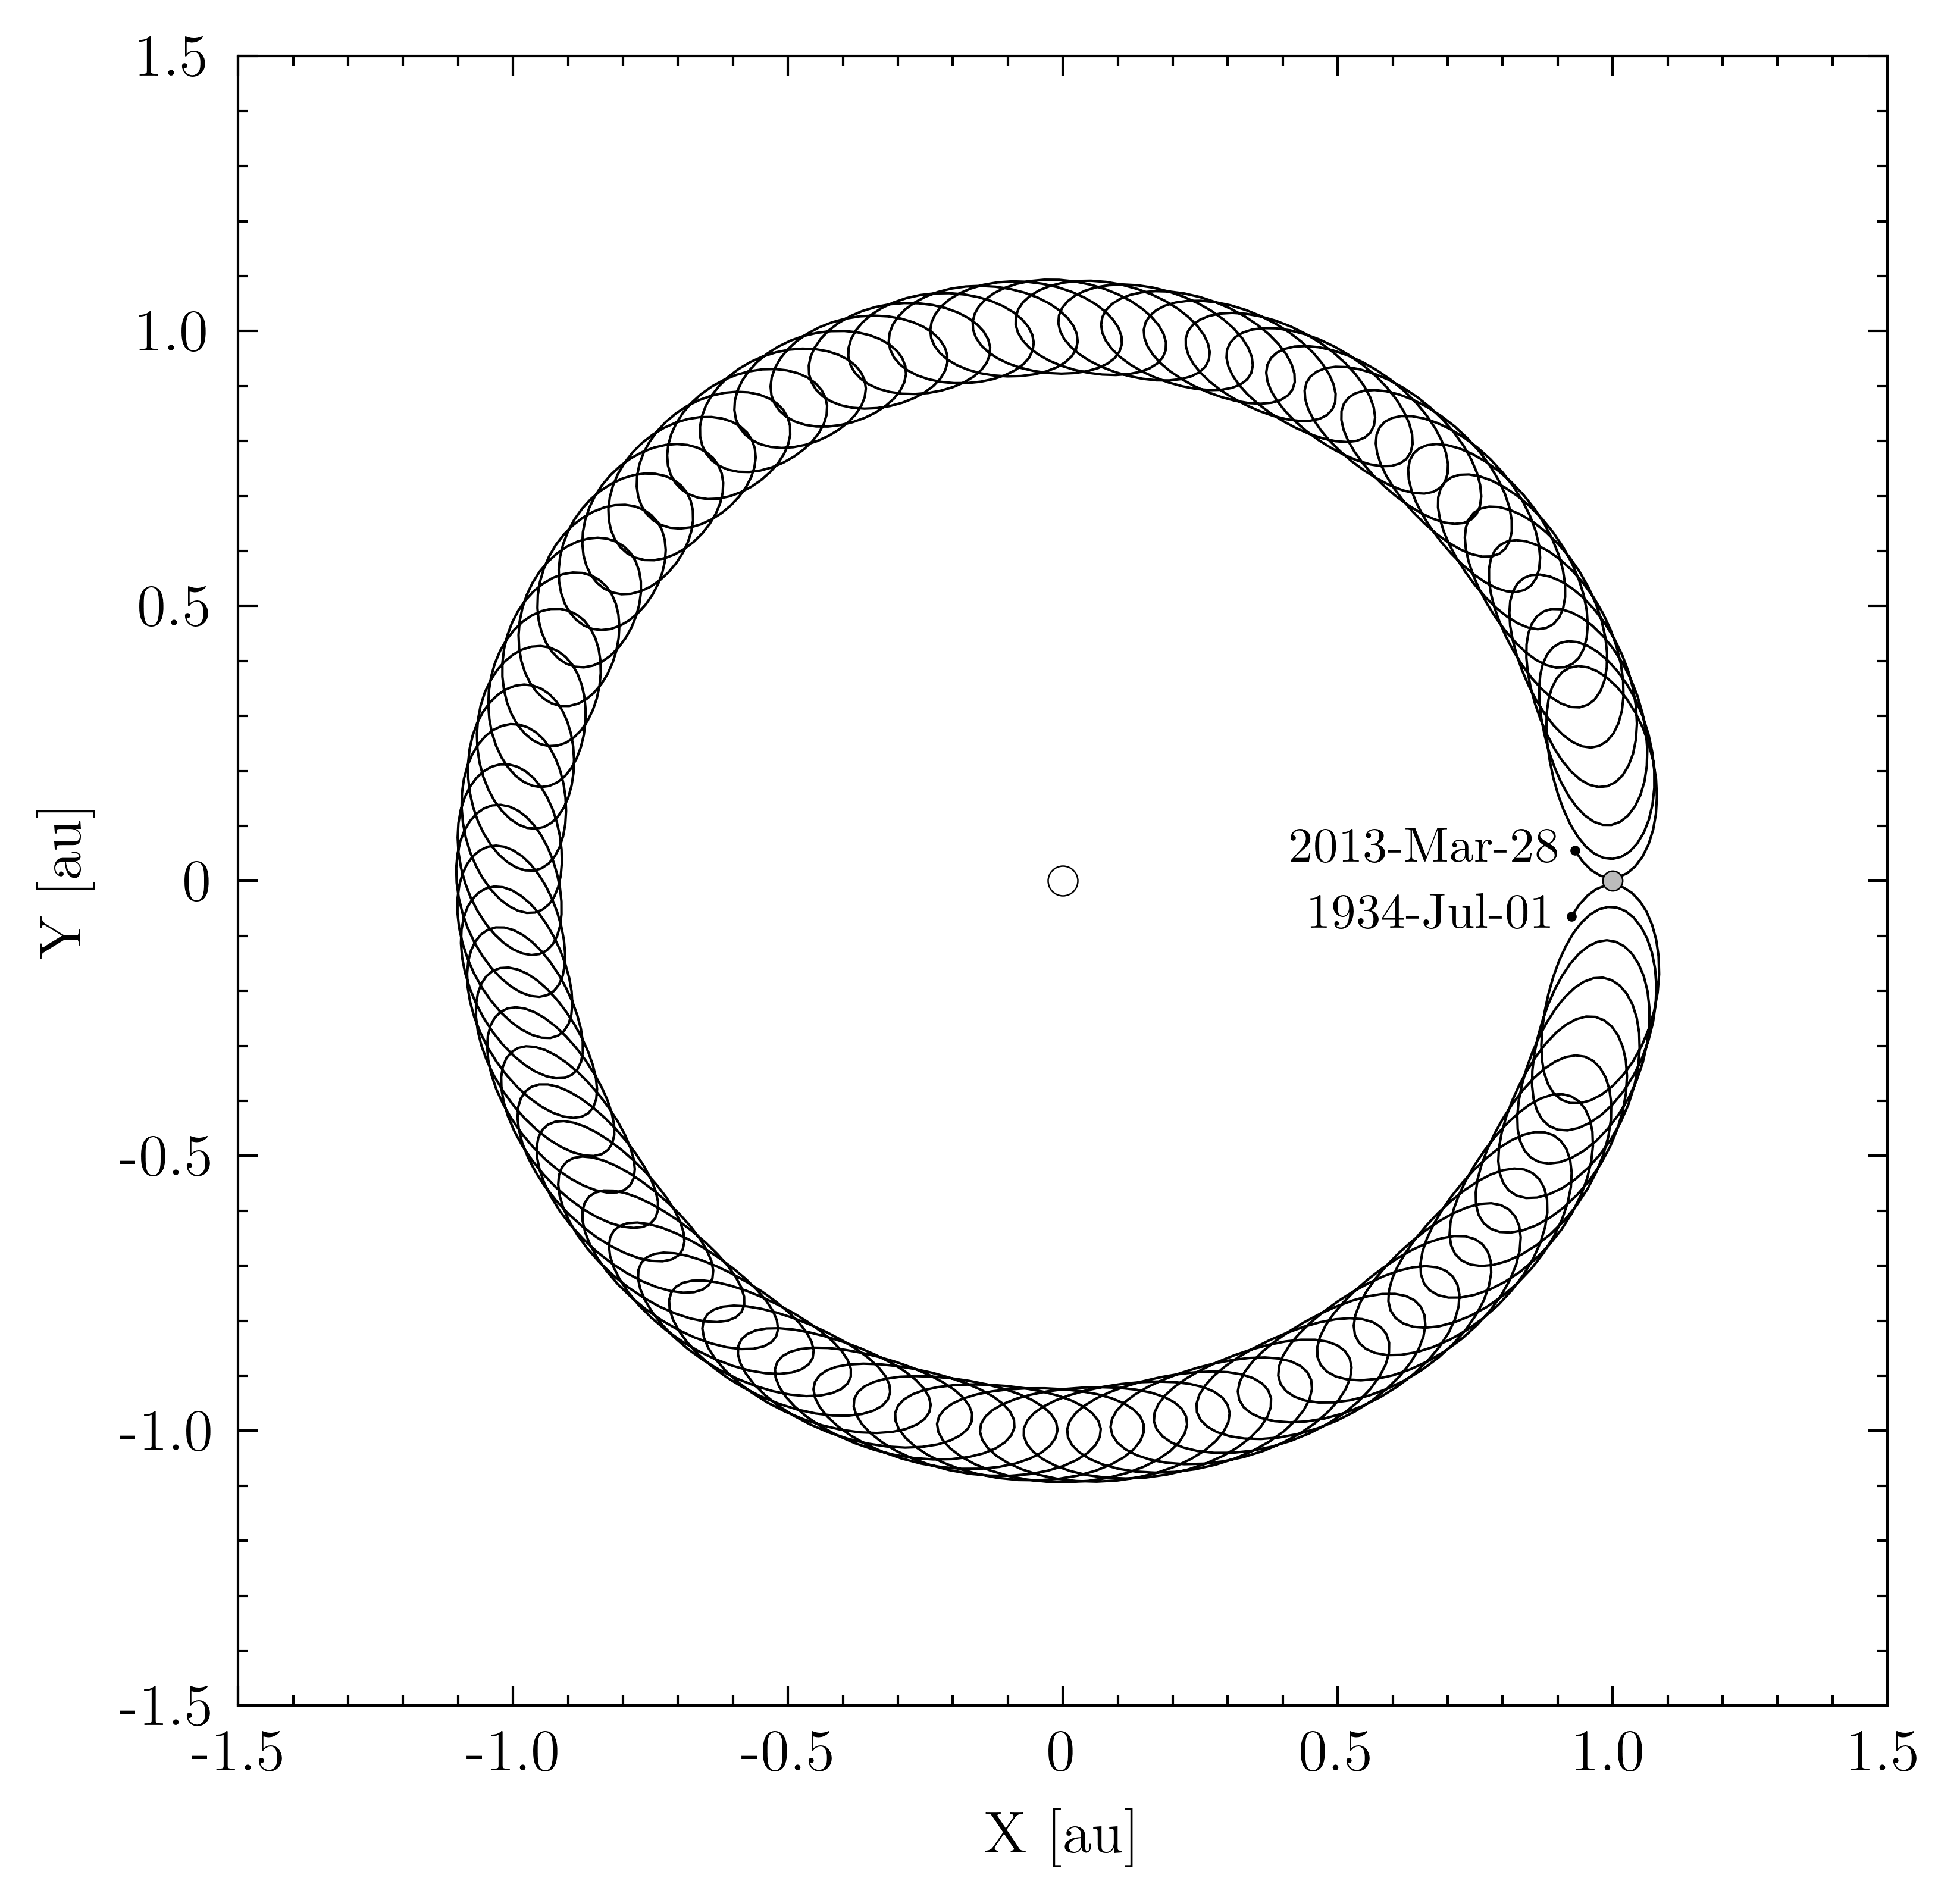

In [8]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax.set_aspect(True)  

# 1:1 axis ratio

ax.set_xlim(-1.5, 1.5)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xticks([-1.5,-1.0,-0.5,0,0.5,1,1.5])
ax.set_xticklabels(['-1.5','-1.0','-0.5','0','0.5','1.0','1.5'])
ax.set_xlabel(r'X [au]',fontsize=axisFontSize)

ax.set_ylim(-1.5, 1.5)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_yticks([-1.5,-1.0,-0.5,0,0.5,1,1.5])
ax.set_yticklabels(['-1.5','-1.0','-0.5','0','0.5','1.0','1.5'])
ax.set_ylabel(r'Y [au]',fontsize=axisFontSize)

# plot the orbit of 2013BS45 in the rotating frame of the Earth-Sun system

ax.plot(xcr,ycr,'-',color='black',lw=0.5,zorder=8)
if showDots:
    ax.plot(xcr,ycr,'o',ms=1,mfc='black',mew=0,zorder=9)
    
# label start and end of the calculation

ax.plot(xcr[0],ycr[0],'o',ms=1,color='black',zorder=10)
ax.text(xcr[0]-0.025,ycr[0],dateTDB[0],va='center',ha='right',fontsize=labelFontSize)

ax.plot(xcr[-1],ycr[-1],'o',ms=1,color='black',zorder=10)
ax.text(xcr[-1]-0.025,ycr[-1],dateTDB[-1],va='center',ha='right',fontsize=labelFontSize)

# Earth and Sun (not to scale)

ax.plot(1,0,'o',ms=4,mfc='#bbbbbb',mec='black',mew=0.3,zorder=10)
ax.plot(0,0,'o',ms=6,mfc='white',mec='black',mew=0.3,zorder=10)

# make the hardcopy

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')